In [1]:
libraries = c("dplyr","ggplot2","gridExtra","RColorBrewer","zoo","scales")
for(x in libraries) {
    library(x,character.only=TRUE,warn.conflicts=FALSE) }

windowsFonts(Times = windowsFont("Times New Roman"))
base_sz = 12 # base_size parameter

# Initialization of array for recorded plots
plot_point_sizes <- c(); nm <- c(); plot_point_sizes <- list()

[1] "Static"


[1] 4.851953

[1] "Periodic"


[1] 2.925658

[1] "Optimal"


[1] 2.523768

[1] "Plotting"


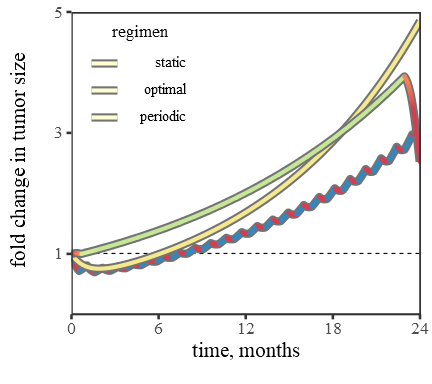

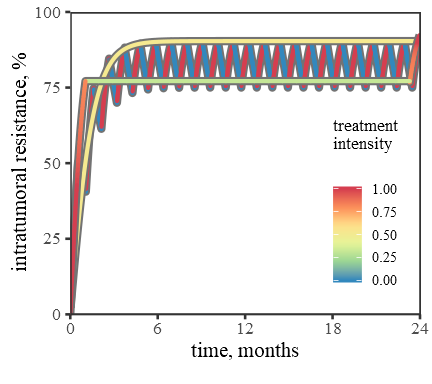

In [2]:
cs = c(3.6,3.2)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

cln_nms = c("time","sigma","resistance","size")
read.table(file="../figures/draft/Fig4-trj_periodic.csv",header=TRUE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df_periodic
read.table(file="../figures/draft/Fig4-trj_const.csv",header=TRUE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df_const
read.table(file="../figures/draft/Fig4-trj_optimal.csv",header=TRUE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df_optimal

print("Static")
df_const %>% tail(1) %>% .$size

print("Periodic")
df_periodic %>% tail(1) %>% .$size

print("Optimal")
df_optimal %>% tail(1) %>% .$size

print("Plotting")

# clrs = c("black",brewer.pal(8,"Set1")[4],brewer.pal(8,"Set1")[2])
# clrs = rep(brewer.pal(8,"Set1")[2],3)
clrs = rep(brewer.pal(8,"Greys")[6],3)
sz = 1.75; fc = .5
x0 = 1.4; len_seg = 1.8
y0 = 4.68

clrs_plt = brewer.pal(6,"Spectral") %>% rev #c("white",brewer.pal(6,"YlOrBr"))

p1 = df_periodic %>% ggplot(aes(x=time,y=size)) +
    geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
    geom_path(color=clrs[1],size=sz) + 
    geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_const,color=clrs[2],size=sz) + 
    geom_path(data=df_const,aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_optimal,aes(x=max(time)-time),color=clrs[3],size=sz) + 
    geom_path(data=df_optimal,aes(x=max(time)-time,color=sigma),lineend="round",size=sz*fc) +
    theme_bw(base_size=12,base_family='Times') + 
    labs(x="time, months",y="fold change in tumor size") +
    scale_color_gradientn(limits=c(0,1),oob=squish, 
                         colours=clrs_plt,
                         values=seq(0,1,length.out=6)) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,24,6)) + 
    scale_y_continuous(expand=c(0,0),breaks = seq(1,10,2)) +
    coord_cartesian(ylim=c(0,5)) +
    guides(color=FALSE) +
    theme(
#         panel.grid.major = element_line(colour = "grey",size=.2),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y=element_text(vjust=7),     
        plot.margin = unit(c(.5,.5,1,1.3),"lines"),
        legend.background = element_rect(fill="white")) +
#     annotate("rect",xmin=0.7,xmax=19.8,ymin=4.6,ymax=6.9,fill="white") +
    annotate("text",x=x0+1.4,y=y0,label='regimen',colour="black",size=3.5,fontface=1,hjust=0,family="Times") +
    annotate("text",x=x0+6.51,y=y0-1.4,label='periodic',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times") +
    annotate("text",x=x0+6.51,y=y0-0.5,label='static',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times") +
    annotate("text",x=x0+6.51,y=y0-0.95,label='optimal',colour="black",size=3,fontface=1,hjust=1,vjust=.5,family="Times") +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-0.525,yend=y0-0.525,colour=clrs[2],size=sz) +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-0.525,yend=y0-0.525,colour=brewer.pal(6,"YlOrBr")[1],size=sz*fc) +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-0.975,yend=y0-0.975,colour=clrs[3],size=sz) +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-0.975,yend=y0-0.975,colour=brewer.pal(6,"YlOrBr")[1],size=sz*fc) +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-1.425,yend=y0-1.425,colour=clrs[1],size=sz) +
    annotate("segment",x=x0,xend=x0+len_seg,y=y0-1.425,yend=y0-1.425,colour=brewer.pal(6,"YlOrBr")[1],size=sz*fc)
p1

p2 = df_periodic %>% ggplot(aes(x=time,y=resistance)) +
    geom_path(color=clrs[1],size=sz) + 
    geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_const,color=clrs[2],size=sz) + 
    geom_path(data=df_const,aes(color=sigma),lineend="round",size=sz*fc) +
    geom_path(data=df_optimal,color=clrs[3],size=sz) + 
    geom_path(data=df_optimal,aes(color=sigma),lineend="round",size=sz*fc) +
    theme_bw(base_size=12,base_family='Times') + 
    labs(x="time, months",y="intratumoral resistance, %") +
    scale_color_gradientn(limits=c(0,1),oob=squish,
                          colours=clrs_plt,
                          values=seq(0,1,length.out=6)) +
    scale_x_continuous(expand=c(0,0),breaks = seq(0,24,6)) +
    scale_y_continuous(expand=c(0,0)) +
    coord_cartesian(ylim=c(0,100)) +
    guides(color=guide_colourbar(title="treatment\nintensity\n",title.position="top",title.vjust=2)) +
    theme(
#         panel.grid.major = element_line(colour = "grey",size=.2),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text=element_text(size=8.5),
        legend.key.height = unit(.8, 'lines'),
        legend.title=element_text(size=10,vjust=1),
        legend.direction = "vertical", 
        legend.position = c(.845,.365),
        legend.key = element_rect(size = 5),
        plot.margin = unit(c(.5,.5,1,.5),"lines")
    )
p2

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/Fig5-A.pdf",useDingbats=FALSE)
ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig5-B.pdf",useDingbats=FALSE)

# Another figure for solution of the optimal control problem

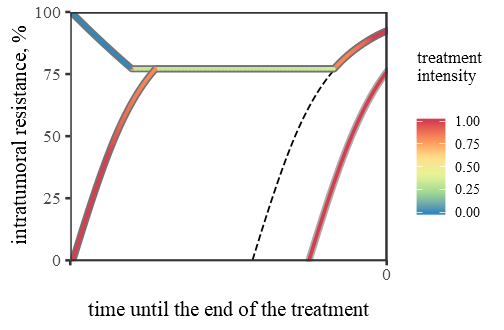

In [3]:
cs = c(4.2,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

cln_nms = c("trajectory","time","sigma","resistance","size")
read.table(file="../figures/draft/Fig4-trjs_optimal.csv",header=TRUE,sep=",",col.names=cln_nms) %>% 
    as.data.frame %>% mutate(time=time/30,resistance=100*resistance) -> df

# clrs = brewer.pal(9,"Set1")
sz = 1.5; fc = 0.5
x0 = 1.4; len_seg = 1.8

tmx = max(df$time)

p2 = df %>% filter(trajectory!=0) %>% 
    ggplot(aes(x=tmx-time,y=resistance,group=factor(trajectory))) +
        geom_path(data=filter(df,trajectory==0),color="black",size=sz*.25,linetype=5) + 
        geom_path(data=filter(df,trajectory==1),color="darkgrey",size=sz) + 
        geom_path(data=filter(df,trajectory==1),aes(color=sigma),lineend="round",size=sz*fc) +
        geom_path(data=filter(df,trajectory==2),color=clrs[3],size=sz) + 
        geom_path(data=filter(df,trajectory==2),aes(color=sigma),lineend="round",size=sz*fc) +
        geom_path(data=filter(df,trajectory==3),color=clrs[2],size=sz) + 
        geom_path(data=filter(df,trajectory==3),aes(color=sigma),lineend="round",size=sz*fc) +
#         geom_path(aes(color=sigma),lineend="round",size=sz*fc) +
        theme_bw(base_size=12,base_family='Times') + 
        labs(x="time until the end of the treatment",y="intratumoral resistance, %") +
        scale_color_gradientn(limits=c(0,1),oob=squish,
                              colours=clrs_plt,
                              values=seq(0,1,length.out=6)) +
        scale_x_continuous(expand=c(0,0),breaks=c(0,4),labels=c("",0)) +
        scale_y_continuous(expand=c(0,0)) +
        coord_cartesian(ylim=c(0,100),xlim=c(0,4)) +
        guides(color=guide_colourbar(title="treatment\nintensity\n",title.position="top",title.vjust=2)) +
        theme(
    #         panel.grid.major = element_line(colour = "grey",size=.2),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            legend.text=element_text(size=8.5),
            legend.key.height = unit(.8, 'lines'),
            legend.title=element_text(size=10,vjust=1),
            legend.direction = "vertical", 
            axis.title.x = element_text(vjust=-3),
            legend.key = element_rect(size = 5),
            plot.margin = unit(c(.5,.5,1,.5),"lines")
        )
p2

ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig4.pdf",useDingbats=FALSE)